In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
import warnings
warnings.simplefilter('ignore')
sns.set_theme(style="dark")

In [ ]:
data = pd.read_csv('/content/weatherHistory.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
print(data["Summary"].value_counts())


Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [ ]:
data = data[(data["Summary"] == "Overcast") | (data["Summary"] == "Clear") | (data["Summary"] == "Foggy")]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34635 entries, 46 to 96436
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            34635 non-null  object 
 1   Summary                   34635 non-null  object 
 2   Precip Type               34396 non-null  object 
 3   Temperature (C)           34635 non-null  float64
 4   Apparent Temperature (C)  34635 non-null  float64
 5   Humidity                  34635 non-null  float64
 6   Wind Speed (km/h)         34635 non-null  float64
 7   Wind Bearing (degrees)    34635 non-null  float64
 8   Visibility (km)           34635 non-null  float64
 9   Loud Cover                34635 non-null  float64
 10  Pressure (millibars)      34635 non-null  float64
 11  Daily Summary             34635 non-null  object 
dtypes: float64(8), object(4)
memory usage: 3.4+ MB


In [ ]:
# Calculating Missing Values
missing_values_count = data.isnull().sum()
missing_values_count

,0
Formatted Date,0
Summary,0
Precip Type,239
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
# Since 359 is a reasonable count. Dropping the respective rows. If the count were smaller we would've filled it up with dummy values
data.dropna(inplace=True)
# Again checking for values
missing_values_count = data.isnull().sum()
missing_values_count

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
# Calculating number of duplicated values
print("Duplicated Values: ",data.duplicated().sum())

Duplicated Values:  17


In [ ]:
# Removing duplicated values
data.drop_duplicates(inplace=True)
# Again checking for duplicated values
print("Duplicated Values: ", data.duplicated().sum())

Duplicated Values:  0


In [ ]:
# Rounding up the float64 data upto 2 decimals.
float_cols = data.select_dtypes(include='float')
data[float_cols.columns] = float_cols.round(2)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
46,2006-04-10 22:00:00.000 +0200,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,0.0,1007.85,Mostly cloudy throughout the day.
47,2006-04-10 23:00:00.000 +0200,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,0.0,1007.89,Mostly cloudy throughout the day.
48,2006-04-11 00:00:00.000 +0200,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,0.0,1007.36,Foggy in the evening.
49,2006-04-11 01:00:00.000 +0200,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,0.0,1007.26,Foggy in the evening.
50,2006-04-11 02:00:00.000 +0200,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,0.0,1005.10,Foggy in the evening.


In [ ]:
# Formatting Date Column. This can be used to identify any seasonality and trends
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce')
# Extracting the relevant components
data["Time"] = [d.time() for d in data['Formatted Date']]
data["Time"] = data["Time"].astype(str)
data["Time"] = data["Time"].str.split(':').str[0].astype(int)
data["Date"] = [d.date() for d in data['Formatted Date']]
data["Date"]= data["Date"].astype(str)
data["Year"] = data["Date"].str.split('-').str[0].astype(int)
data["Month"] = data["Date"].str.split('-').str[1].astype(int)
data["Day"] = data["Date"].str.split('-').str[2].astype(int)
# Dropping the original column
data = data.drop(columns=['Formatted Date','Date'], axis=1)


In [ ]:
# It can be seen that the feature "Loud Cover" have only value '0' and mean and other statistical overview also support the deduction. Hence, it is the redundant column
data["Loud Cover"].value_counts()

,count
Loud Cover,
0.0,34379


In [ ]:
# Removing 'Loud Cover'
data.drop(columns=["Loud Cover"], axis=1, inplace=True)
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Time,Year,Month,Day
46,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,Mostly cloudy throughout the day.,22,2006,4,10
47,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,Mostly cloudy throughout the day.,23,2006,4,10
48,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,Foggy in the evening.,0,2006,4,11
49,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,Foggy in the evening.,1,2006,4,11
50,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,Foggy in the evening.,2,2006,4,11


In [ ]:
# Different types of columns
numeric_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
categorical_columns = list(data.select_dtypes(include=['object']).columns)
continuous_columns = [i for i in numeric_columns if len(list(data[i].unique()))>=25]
discrete_columns = [i for i in numeric_columns if len(list(data[i].unique()))<25]
print("Numerical Columns: ", numeric_columns)
print()
print("Categorical Columns: ", categorical_columns)
print()
print("Continuous Columns: ", continuous_columns)
print()
print("Discrete Columns: ", discrete_columns)

Numerical Columns:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Time', 'Year', 'Month', 'Day']

Categorical Columns:  ['Summary', 'Precip Type', 'Daily Summary']

Continuous Columns:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Day']

Discrete Columns:  ['Time', 'Year', 'Month']


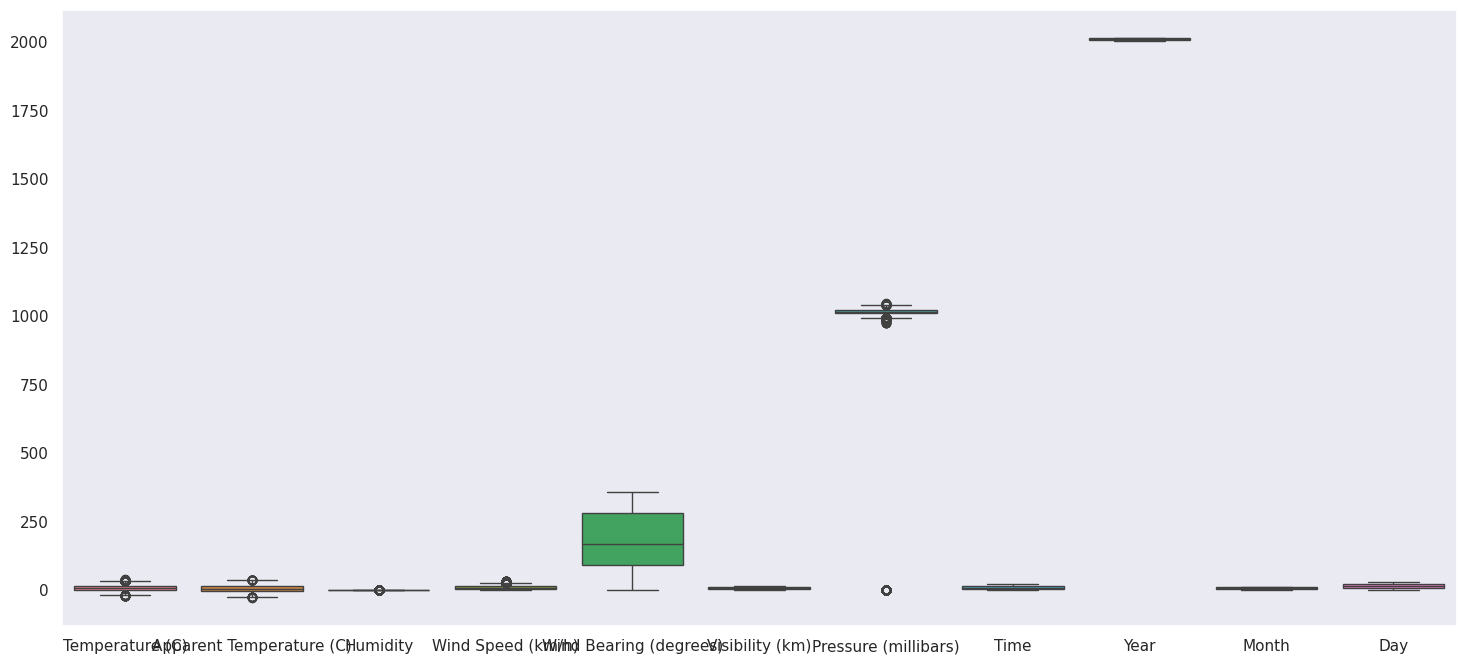

In [ ]:
# Plotting for outliers in the data.
plt.figure(figsize=(18, 8))
sns.boxplot(data=data[numeric_columns])
plt.show()

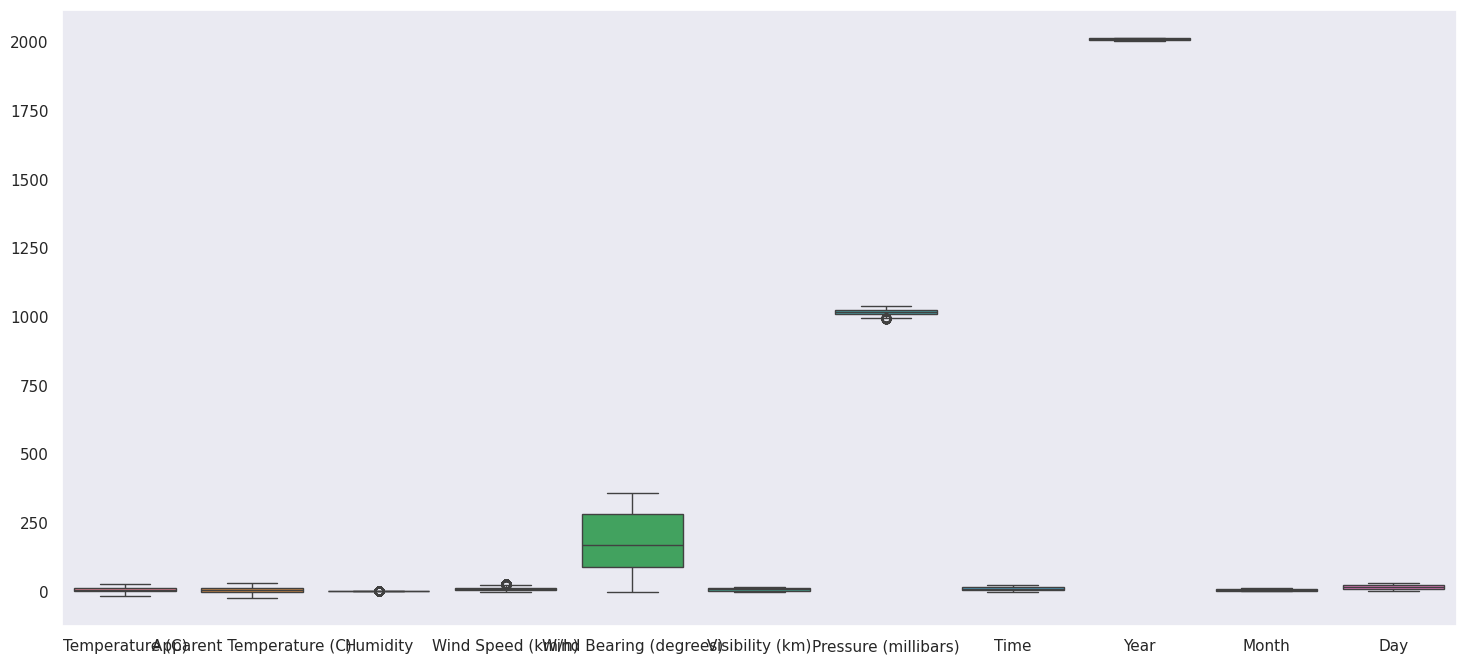

In [ ]:
def remove_outliers(df, feature):
    """
    Remove Outliers using IRQ method

    df: dataframe
    feature: dataframe column"""
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

  # Removing Outliers
data = remove_outliers(data, "Pressure (millibars)")
data = remove_outliers(data, "Wind Speed (km/h)")
data = remove_outliers(data, "Humidity")
data = remove_outliers(data, "Temperature (C)")
data = remove_outliers(data, "Apparent Temperature (C)")

plt.figure(figsize=(18, 8))
sns.boxplot(data=data[numeric_columns])
plt.show()

In [ ]:
# Target variable
# Applying mapping
encoder = LabelEncoder()
y = data["Summary"]
y = encoder.fit_transform(y)

# Checking the mapping of the classes
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for class_label, class_number in class_mapping.items():
    print(f"Class '{class_label}' is labeled as {class_number}")


Class 'Clear' is labeled as 0
Class 'Foggy' is labeled as 1
Class 'Overcast' is labeled as 2


In [ ]:
# Input features dataset
input_df = data.drop(columns="Summary", axis=1)
input_df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Time,Year,Month,Day
46,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,Mostly cloudy throughout the day.,22,2006,4,10
47,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,Mostly cloudy throughout the day.,23,2006,4,10
48,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,Foggy in the evening.,0,2006,4,11
49,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,Foggy in the evening.,1,2006,4,11
50,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,Foggy in the evening.,2,2006,4,11


In [ ]:
# Target variable
# Applying mapping
encoder = LabelEncoder()
y = data["Summary"]
y = encoder.fit_transform(y)

# Checking the mapping of the classes
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for class_label, class_number in class_mapping.items():
    print(f"Class '{class_label}' is labeled as {class_number}")

Class 'Clear' is labeled as 0
Class 'Foggy' is labeled as 1
Class 'Overcast' is labeled as 2


In [ ]:
# As "Precip Type" have only 2 values, hence applying binary encoding
mapping = {'rain': 0, 'snow': 1}
input_df['Precip Type'] = input_df['Precip Type'].map(mapping)

In [ ]:
# As "Daily Summary" have 221 unique values, hence applying Frequency encoding
# Creating a new column for frequency encoding and removing previous column
input_df['Daily Summary Frequency'] = input_df['Daily Summary'].map(input_df['Daily Summary'].value_counts(normalize=True))
input_df.drop(columns=['Daily Summary'], axis=1, inplace=True)
# Checking data
input_df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Time,Year,Month,Day,Daily Summary Frequency
46,0,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,22,2006,4,10,0.177457
47,0,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,23,2006,4,10,0.177457
48,0,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,0,2006,4,11,0.004617
49,0,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,1,2006,4,11,0.004617
50,0,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,2,2006,4,11,0.004617


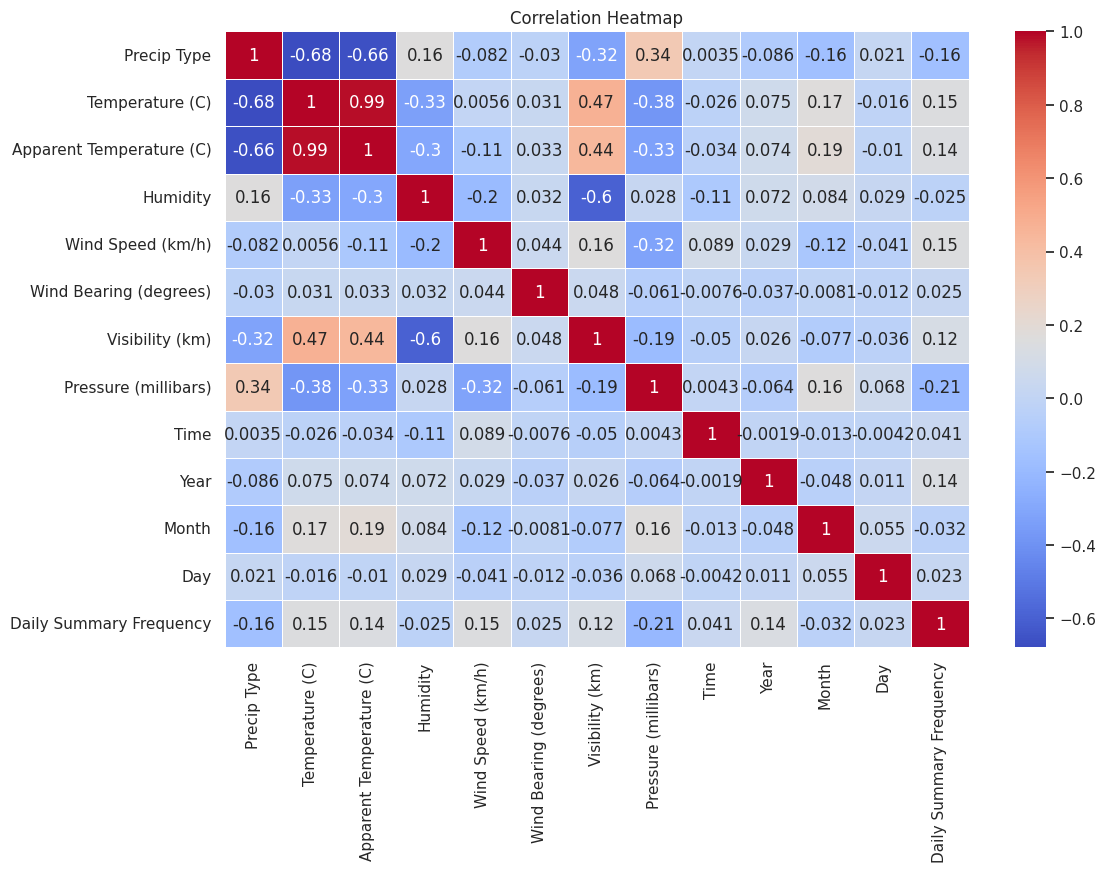

In [ ]:
# Confirming multicollinearity using heatmap
sns.set(style="white")
plt.figure(figsize=(12,8))
sns.heatmap(input_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# As Daily Summary Frequency has a negligible correlation with the other features and it is apparent that the final target is not going to be affected by this, removing it.
input_df.drop(['Daily Summary Frequency'], axis=1, inplace=True)

In [ ]:
# As VIF of Temperature (C) is the highest and Temperature is highly correlated with Apparent Temperature, removing it
input_df.drop(['Temperature (C)'], axis=1, inplace=True)

In [ ]:
# Creating X input set
X = input_df.values
X

array([[0.000e+00, 1.442e+01, 5.800e-01, ..., 2.006e+03, 4.000e+00,
        1.000e+01],
       [0.000e+00, 1.426e+01, 5.900e-01, ..., 2.006e+03, 4.000e+00,
        1.000e+01],
       [0.000e+00, 1.377e+01, 6.000e-01, ..., 2.006e+03, 4.000e+00,
        1.100e+01],
       ...,
       [0.000e+00, 1.502e+01, 9.000e-01, ..., 2.016e+03, 9.000e+00,
        9.000e+00],
       [0.000e+00, 1.387e+01, 9.300e-01, ..., 2.016e+03, 9.000e+00,
        9.000e+00],
       [0.000e+00, 1.607e+01, 8.800e-01, ..., 2.016e+03, 9.000e+00,
        9.000e+00]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Apply scaling on the input_df DataFrame
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
def checking_overfitting_undefitting(y_train, y_train_pred, y_test, y_test_pred):
    """
    Print whether the model is underfit, overfit or good fit.

    y_train = training data
    y_train_pred = predictions on training data
    y_test = testing data
    y_test_pred = predictions on testing data
    """
    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    if training_accuracy<=0.65:
        print("Model is underfitting.")
    elif training_accuracy>0.65 and abs(training_accuracy-testing_accuracy)>0.15:
        print("Model is overfitting.")
    else:
        print("Model is not underfitting/overfitting.")


In [ ]:

# Hyperparameter tuning
parameters = {'solver': ['liblinear', 'saga'],
              'multi_class':['ovr', 'multinomial'],
              'C':[0.001, 0.01, 10.0],
              'penalty': ['l1', 'l2']}
# Model Creation and Training
model_lr = LogisticRegression(n_jobs=-1)
models_lr = GridSearchCV(estimator=model_lr, param_grid=parameters, cv=4)
models_lr.fit(x_train, y_train)
best_parameters = models_lr.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions for train
best_model_lr = models_lr.best_estimator_
y_pred_lr = best_model_lr.predict(x_train)
# Predictions for test
y_pred_lr_new = best_model_lr.predict(x_test)
checking_overfitting_undefitting(y_train, y_pred_lr, y_test, y_pred_lr_new)

Best Hyperparameters: {'C': 10.0, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}

Model is not underfitting/overfitting.


In [ ]:
def calculate_classification_metrics(y_true, y_pred, algorithm):
    """
    Return the classification Metrics

    y_true = actual values
    y_pred = predicted values
    y_pred_probability = probability values
    algorithm = algorithm name
    """
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 3)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 3)
    print("Algorithm: ", algorithm)
    print()
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Overcast', 'Clear','Foggy']
    plt.figure(figsize=(10, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

# Callback function to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.90) and (logs.get('accuracy')>0.95):
            print("\nValidation and training accuracies are high so cancelling training!")
            self.model.stop_training = True

Testing Performance
Algorithm:  Logistic Regression

Accuracy: 0.832
Precision: 0.828
Recall: 0.832
F1 Score: 0.829



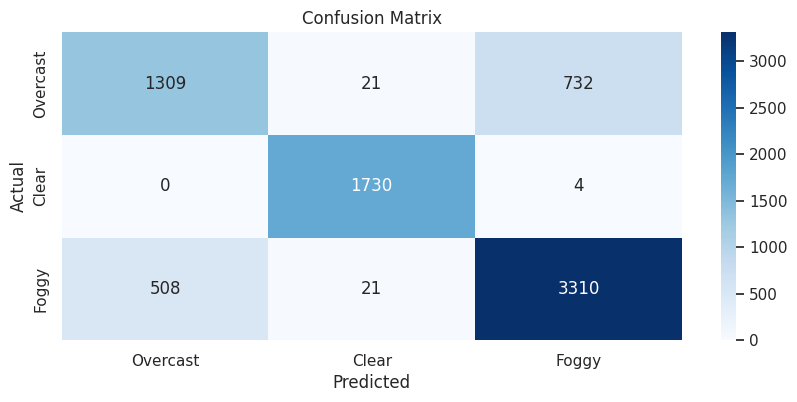

In [ ]:
# Evaluation Metrics Calculation
print("Testing Performance")
accuracy_lr, precision_lr, recall_lr, f1_lr = calculate_classification_metrics(y_test, y_pred_lr_new, "Logistic Regression")

In [ ]:
# Hyperparameter tuning
parameters = {'loss':['log_loss','perceptron','hinge','squared_epsilon_insensitive'],
              'penalty': ['l1', 'l2'],
              'alpha':[0.001,0.01,0.0001],
              'learning_rate':['optimal','adaptive','invscaling']}
# Model Creation and Training
model_svc = SGDClassifier()
models_svc = GridSearchCV(estimator=model_svc, param_grid=parameters, cv=4)
models_svc.fit(x_train, y_train)
best_parameters = models_svc.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions on train data
best_model_svc = models_svc.best_estimator_
y_pred_svc = best_model_svc.predict(x_train)
# Predictions on test data
y_pred_svc_new = best_model_svc.predict(x_test)
checking_overfitting_undefitting(y_train, y_pred_svc, y_test, y_pred_svc_new)

Best Hyperparameters: {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'l1'}

Model is not underfitting/overfitting.


Testing Performance
Algorithm:  SVC

Accuracy: 0.823
Precision: 0.82
Recall: 0.823
F1 Score: 0.822



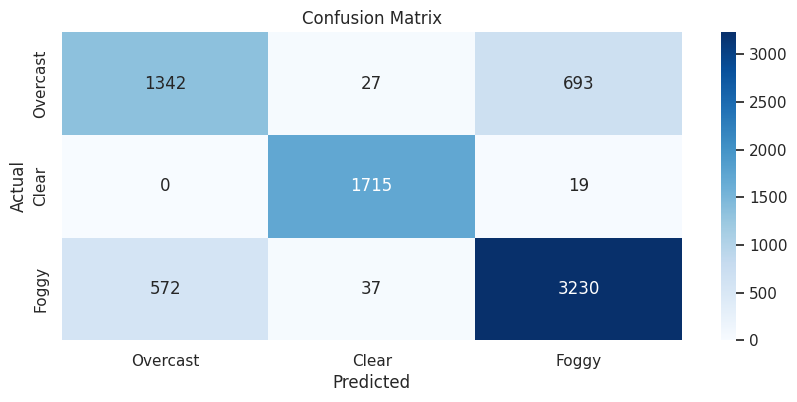

In [ ]:
# Evaluation Metrics Calculation
print("Testing Performance")
accuracy_svc, precision_svc, recall_svc, f1_svc = calculate_classification_metrics(y_test, y_pred_svc_new, "SVC")

In [ ]:
# Hyperparameter tuning
parameters = {'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree','kd_tree','brute'],
            'p': [1,2]}
# Model Creation and Training
model_knn = KNeighborsClassifier(n_neighbors=5)
models_knn = GridSearchCV(estimator=model_knn, param_grid=parameters, cv=4)
models_knn.fit(x_train, y_train)
best_parameters = models_knn.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions on train data
best_model_knn = models_knn.best_estimator_
y_pred_knn = best_model_knn.predict(x_train)
# Predictions on test data
y_pred_knn_new = best_model_knn.predict(x_test)
checking_overfitting_undefitting(y_train, y_pred_knn, y_test, y_pred_knn_new)

Best Hyperparameters: {'algorithm': 'auto', 'p': 1, 'weights': 'distance'}

Model is not underfitting/overfitting.


Testing Performance
Algorithm:  KNN

Accuracy: 0.903
Precision: 0.903
Recall: 0.903
F1 Score: 0.903



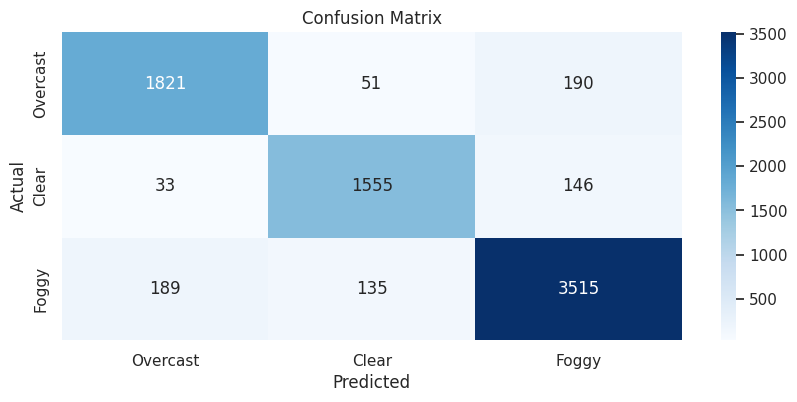

In [ ]:
# Evaluation Metrics Calculation
print("Testing Performance")
accuracy_knn, precision_knn, recall_knn, f1_knn = calculate_classification_metrics(y_test, y_pred_knn_new, "KNN")

In [ ]:
# Hyperparameter tuning
parameters = {'max_depth': [None, 5],
            'class_weight': [None, 'balanced'],
            'min_samples_split': [None, 2, 5]}
# Model Creation and Training
model_rf = RandomForestClassifier()
models_rf = GridSearchCV(estimator=model_rf, param_grid=parameters, cv=4)
models_rf.fit(x_train, y_train)
best_parameters = models_rf.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions on train data
best_model_rf = models_rf.best_estimator_
y_pred_rf = best_model_rf.predict(x_train)
# Predictions on test data
y_pred_rf_new = best_model_rf.predict(x_test)
checking_overfitting_undefitting(y_train, y_pred_rf, y_test, y_pred_rf_new)


Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2}

Model is not underfitting/overfitting.


Testing Performance
Algorithm:  Random Forest

Accuracy: 0.939
Precision: 0.939
Recall: 0.939
F1 Score: 0.938



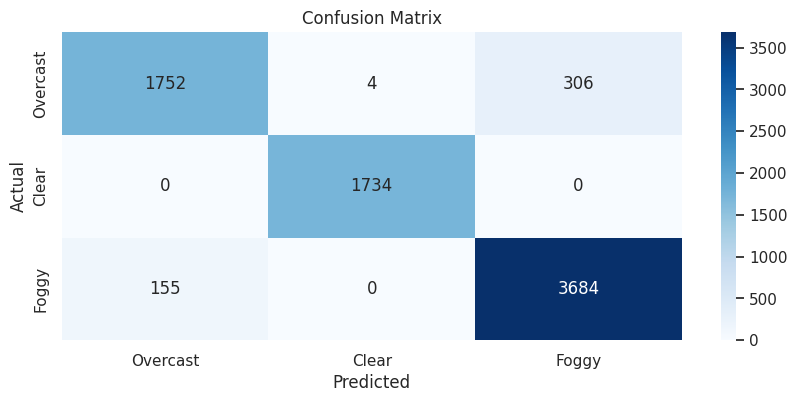

In [ ]:
# Evaluation Metrics Calculation
print("Testing Performance")
accuracy_rf, precision_rf, recall_rf, f1_rf = calculate_classification_metrics(y_test, y_pred_rf_new, "Random Forest")